In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
import scipy.io
import os

from functions import *

### MINDy_RAW_CV prediction

In [38]:
#import data
simul = pd.read_csv("./data_simulations/MINDy_null_data_2.csv", header=None)
simul = simul.T

79


<Axes: >

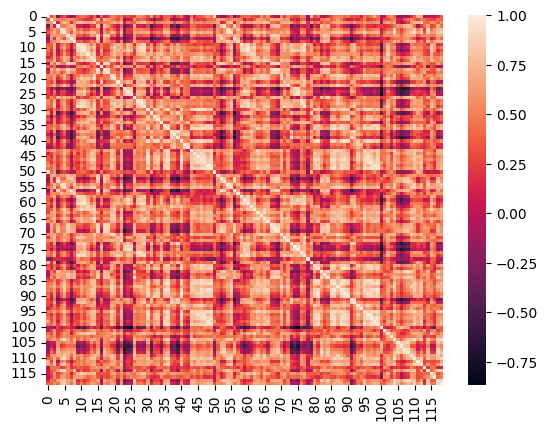

In [39]:
#Get stream, visualize 42nd FC
stream = dFC_stream(simul, 15)
print(len(stream))

FC_0 = stream[42]
sn.heatmap(FC_0)

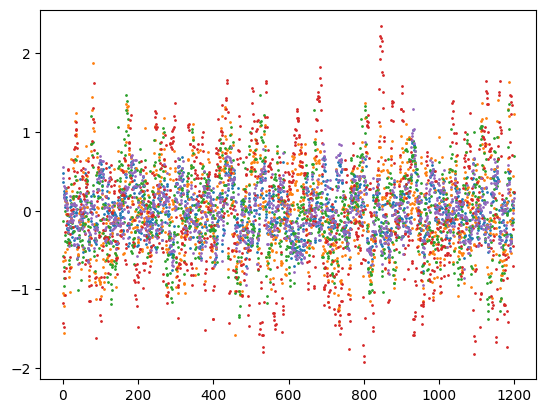

In [40]:
#Visualize time series
plt.scatter(np.arange(len(simul[0])), simul[0], s=1)
plt.scatter(np.arange(len(simul[1])), simul[1], s=1)
plt.scatter(np.arange(len(simul[2])), simul[2], s=1)
plt.scatter(np.arange(len(simul[3])), simul[3], s=1)

plt.scatter(np.arange(len(simul[50])), simul[50], s=1)

<Axes: >

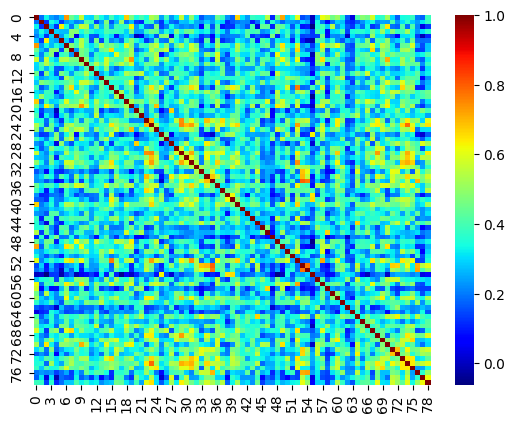

In [41]:
#dFC matrix
autocorrelation = dFC_matrix(stream)
sn.heatmap(autocorrelation, cmap="jet")

In [42]:
#Get v distributions
vz_short = pooled_v_stream(simul, 3, 8)
vz_mid = pooled_v_stream(simul, 9, 32)
vz_long = pooled_v_stream(simul, 33, 105)

(0.0, 1.1)

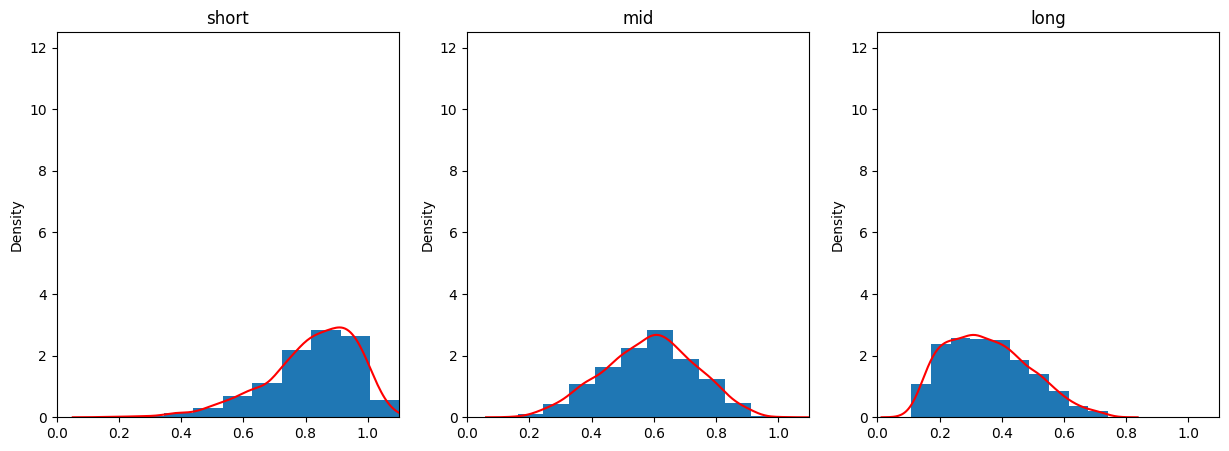

In [43]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("short")
plt.hist(vz_short, density=True)
sn.kdeplot(vz_short, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(132)
plt.title("mid")
plt.hist(vz_mid, density=True)
sn.kdeplot(vz_mid, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(133)
plt.title("long")
plt.hist(vz_long, density=True)
sn.kdeplot(vz_long, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

### MINDy_Simple parameters - my propagator

In [44]:
#Load parameters
W = scipy.io.loadmat("./data_simulations/W.mat")["W"]
D = scipy.io.loadmat("./data_simulations/D.mat")["D"]
alpha = scipy.io.loadmat("./data_simulations/alpha.mat")["alpha"]

alpha = alpha[:, 0]
D = D[:, 0]

In [45]:
#Propagation
id_max = 1200
Xt = np.zeros((119, id_max))    #region x times
x1 = np.random.random((119))    #random first step
Xt[:, 0] = x1

TR = 0.7
b = 6.6667
for i in range(id_max-1):

    #Update rule
    psi = (alpha**2 + (b*x1+0.5)**2)**0.5 - (alpha**2 + (b*x1-0.5)**2)**0.5
    x2 = x1 + (np.dot(W, psi) - D*x1)*TR

    Xt[:, i+1] = x2
    x1 = x2

#Get "simul" Pandas DataFrame (times x region)
simul = pd.DataFrame(Xt).T

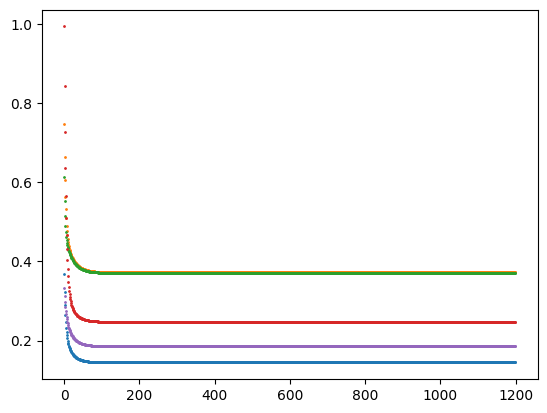

In [46]:
#Visualize time series
plt.scatter(np.arange(len(simul[0])), simul[0], s=1)
plt.scatter(np.arange(len(simul[1])), simul[1], s=1)
plt.scatter(np.arange(len(simul[2])), simul[2], s=1)
plt.scatter(np.arange(len(simul[3])), simul[3], s=1)

plt.scatter(np.arange(len(simul[50])), simul[50], s=1)

### MINDy_RAW_CV parameters - my propagator

In [47]:
#Load parameters
W = scipy.io.loadmat("./data_simulations/W_2.mat")["W_2"]
D = scipy.io.loadmat("./data_simulations/D_2.mat")["D_2"]
alpha = scipy.io.loadmat("./data_simulations/alpha_2.mat")["alpha_2"]

alpha = alpha[:, 0]
D = D[:, 0]

In [48]:
#Propagation
id_max = 1200
Xt = np.zeros((119, id_max))    #region x times
x1 = np.random.random((119))    #random first step
Xt[:, 0] = x1

TR = 0.7
b = 6.6667
for i in range(id_max-1):

    #Update rule
    psi = (alpha**2 + (b*x1+0.5)**2)**0.5 - (alpha**2 + (b*x1-0.5)**2)**0.5
    x2 = x1 + (np.dot(W, psi) - D*x1)*TR

    Xt[:, i+1] = x2
    x1 = x2

#Get "simul" Pandas DataFrame (times x region)
simul = pd.DataFrame(Xt).T

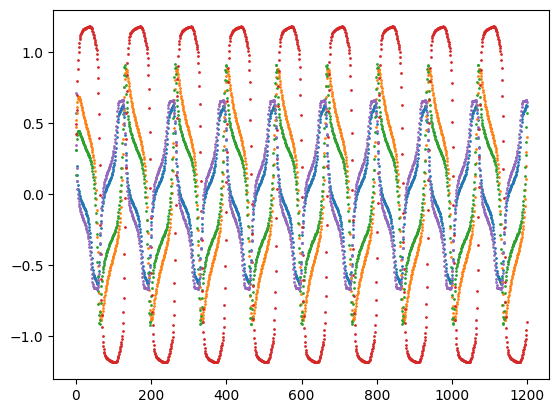

In [49]:
#Visualize time series
plt.scatter(np.arange(len(simul[0])), simul[0], s=1)
plt.scatter(np.arange(len(simul[1])), simul[1], s=1)
plt.scatter(np.arange(len(simul[2])), simul[2], s=1)
plt.scatter(np.arange(len(simul[3])), simul[3], s=1)

plt.scatter(np.arange(len(simul[50])), simul[50], s=1)

80


<Axes: >

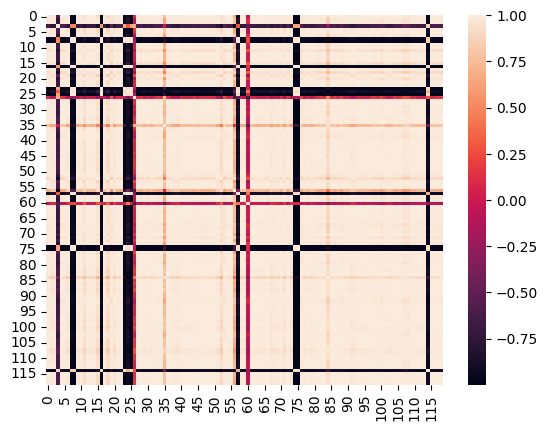

In [50]:
#Get stream, visualize 42nd FC
stream = dFC_stream(simul, 15)
print(len(stream))

FC_0 = stream[42]
sn.heatmap(FC_0)

<Axes: >

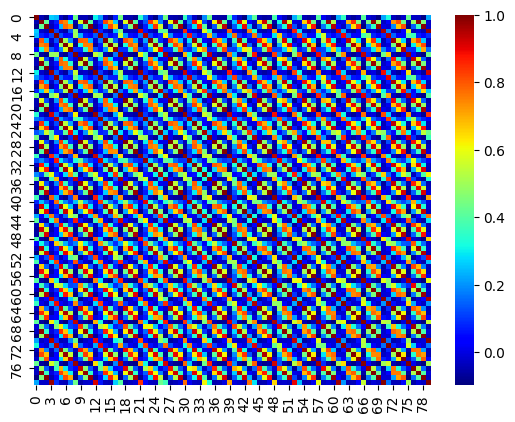

In [51]:
#dFC matrix
autocorrelation = dFC_matrix(stream)
sn.heatmap(autocorrelation, cmap="jet")

In [52]:
#Get v distributions
vz_short = pooled_v_stream(simul, 3, 8)
vz_mid = pooled_v_stream(simul, 9, 32)
vz_long = pooled_v_stream(simul, 33, 105)

(0.0, 1.1)

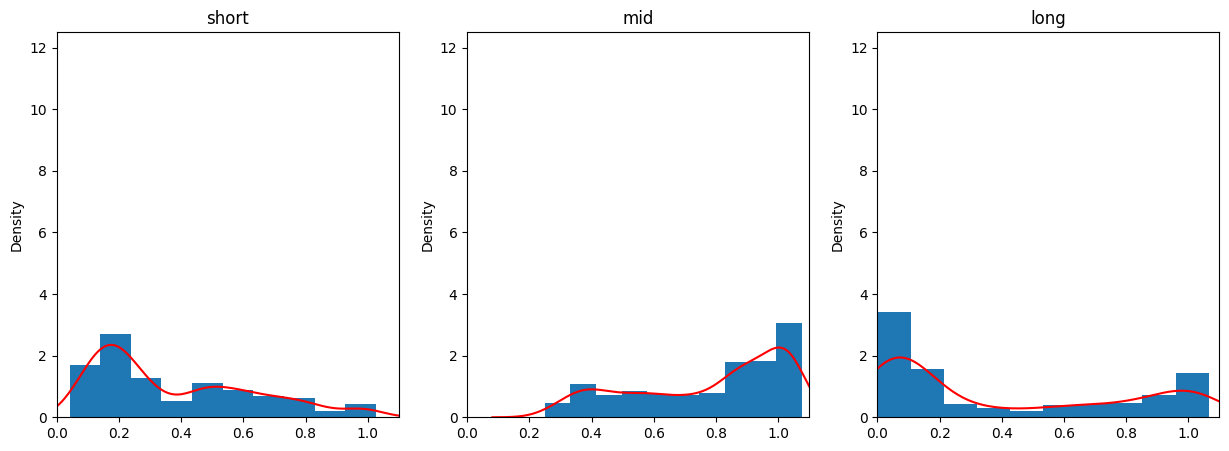

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("short")
plt.hist(vz_short, density=True)
sn.kdeplot(vz_short, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(132)
plt.title("mid")
plt.hist(vz_mid, density=True)
sn.kdeplot(vz_mid, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(133)
plt.title("long")
plt.hist(vz_long, density=True)
sn.kdeplot(vz_long, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))